In [2]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm

import pandas as pd
import random
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [3]:
driver = webdriver.Chrome()
driver.get('https://www.oliveyoung.co.kr/store/goods/getGoodsDetail.do?goodsNo=A000000190531&dispCatNo=10000010001&trackingCd=Cat10000010001_Clickbest&curation=like&egcode=c001_c001&rccode=pc_category_01_a&egrankcode=19&t_page=%EC%B9%B4%ED%85%8C%EA%B3%A0%EB%A6%AC%EA%B4%80&t_click=%EB%A7%8E%EC%9D%B4%EB%B3%B8%EC%83%81%ED%92%88&t_number=19')
driver.implicitly_wait(10)  # 정보가 모두 뜰때까지 최대 10초를 기다린다.
time.sleep(3) 

In [4]:
# 상품설명, 구매정보, 리뷰, Q&A
nav = driver.find_element(By.CLASS_NAME, 'prd_detail_tab').find_elements(By.ID, 'reviewInfo')

# 리뷰 클릭하기
for i in nav:
    print(i.text)
    i.click()
    time.sleep(2)

리뷰(31,543)


In [5]:
# 리뷰 평점 1점, 2점만 적용
filter = driver.find_element(By.CLASS_NAME, 'btnOption')
filter.click()
time.sleep(2)

score = driver.find_element(By.ID, 'searchPoint').find_elements(By.TAG_NAME, 'li')
for i in score[-2:]:
    i.click()
    time.sleep(1)

apply = driver.find_element(By.CLASS_NAME, 'area1sButton.filterN2_pc').find_element(By.CLASS_NAME, 'btnGreen')
apply.click()
time.sleep(2)


In [6]:
# for i in driver.find_element(By.CLASS_NAME, "pageing").find_elements(By.TAG_NAME, 'a'):
#     print(i.text)

In [7]:
# 1~11페이지 리뷰 크롤링
current = 1
box=[]
for j in driver.find_elements(By.CLASS_NAME, 'review_cont'):
    # star = j.find_element(By.CLASS_NAME, 'point').text
    content = j.find_element(By.CLASS_NAME, 'txt_inner').text
    box.append(content)

for i in tqdm(range(10)):
    a=driver.find_element(By.CLASS_NAME, "pageing").find_elements(By.TAG_NAME, 'a')[i]
    a.click()

    time.sleep(1)

    for j in driver.find_elements(By.CLASS_NAME, 'review_cont'):

        # 내용없는 리뷰 예외처리
        try:
            content = j.find_element(By.CLASS_NAME, 'txt_inner').text
            box.append(content)
        except:
            pass


100%|██████████| 10/10 [00:45<00:00,  4.59s/it]


In [8]:
# 12~20페이지 리뷰 크롤링
for i in tqdm(range(1, 10)):
    a=driver.find_element(By.CLASS_NAME, "pageing").find_elements(By.TAG_NAME, 'a')[i]
    a.click()

    time.sleep(1)
   
    for j in driver.find_elements(By.CLASS_NAME, 'review_cont'):
        # star = j.find_element(By.CLASS_NAME, 'point').text

        # 내용없는 리뷰 예외처리
        try:
            content = j.find_element(By.CLASS_NAME, 'txt_inner').text
            box.append(content)
        except:
            pass
        

100%|██████████| 9/9 [02:36<00:00, 17.35s/it]


In [9]:
len(box)

183

In [10]:
box

['저는 원래 악지성피부입니다..\n근데 스트라이덱스 패드를 너무 과하게 사용해서\n피부장벽 다 벗겨지고 갈라지고 속건조가 너무 심한거예요..\n작년 겨울에 구매하고 지금은 처박아 둔 이 제품을\n지푸라기 잡는 심정으로 진짜 소~~량 사용해 봤는데\n아무리 양조절을 해도\n피지오겔과 지성피부는 절대 가까워 질 수 없는 사이라는 걸 다시 깨달았습니다..\n진짜 콩알만큼 덜어서 발라줬는데도\n지성피부분들은 아실지 모르겠지만\n유분이 모공에 끼고 모공이 막혀서 나는 오돌도돌한 트러블 있잖아요\n그게 볼 턱 얼굴 외곽 전체에 올라오더라구요 ㅠㅠㅠ\n피부결 진짜 다 망쳤습니다..\n모공이 막히니까 최대한 더 피한 나비존 입가에는 블랙헤드 파티구요\n화농성 트러블은 생리 때만 가끔 나서 진정효과도 딱히 체감하기엔 무리였고\n그냥 이제 피지오겔은 거들떠도 안 보려구요.',
 '여드름 난 지복합성 피부인 제가 사용하기엔 기름지고, 번들거려서 별로였어요 ㅠㅠ',
 '안타깝게도 저랑은 잘 맞지 않는😂\n지성 피부인데 가벼운 에센스나 수분크림도 맞지가 않아서 혹시 유분이 부족한간가 하고 사본건데..ㅋㅋㅋ\n역시 이것도 맞지가 않네요ㅠㅠ\n저한테 맞는 화장품이 없어서 요즘에는 알로에 젤만 바르고 있는ㅋㅋㅋ(그나마 이게 맞아요ㅋㅋ아니면 아무것도 안바르거나;;)\n혹시나 지루성피부염이 있으신 분들은 이거 쓰면 열감이 더 올라서 가려우니까 조심하시길😓\n제형은 바이오더마 pp밤이랑 비슷하고 사용감도 비슷하고 유분도 비슷한ㅋㅋㅋ\n둘다 안맞는다는건 함정이지만..\n바르면 얼굴이 축축(?)해진다는게 어떤 느낌인지 알 수 있어요ㅋㅋㅋ\n저는 아주 한 겨울에 진짜 건조한 부분에다가만 써야할듯해여ㅋㅋㅋ\n아 근데 보습은 진짜 좋은지 귀 쪽에 각질 일어난 부분에 바르니까 다음날 보들보들해진ㅋㅋㅋ',
 '아니 자극은 없고 순한게 느껴지는데..\n보습 잘 되는거 느껴지는데..\n제 피부가 그렇게 민감한 편도 아닌데...\n피부 뒤집어짐 ㅜ진짜 ..\n바르고 바로 터치면 톡 터지는 그런거\n막 올라와서

In [11]:
df = pd.DataFrame(box)
df[0] = df[0].str.replace('\n', ' ')
df

,0
0,저는 원래 악지성피부입니다.. 근데 스트라이덱스 패드를 너무 과하게 사용해서 피부장...
1,"여드름 난 지복합성 피부인 제가 사용하기엔 기름지고, 번들거려서 별로였어요 ㅠㅠ"
2,안타깝게도 저랑은 잘 맞지 않는😂 지성 피부인데 가벼운 에센스나 수분크림도 맞지가 ...
3,아니 자극은 없고 순한게 느껴지는데.. 보습 잘 되는거 느껴지는데.. 제 피부가 그...
4,리뷰를 보고 사야했는데... 남들 다 쓰길래 좋은줄 알고 샀다가 여드름 폭탄 맞았어...
...,...
178,건성인 엄마에게 산물-무난하게 잘 쓰시는 듯 한데 ㅠ
179,순하다고 하는데 제 피부가 악건성이라 그런지 자극이 느껴져서 사용을 하지 않고 있어...
180,저는 너무 별로더라구요 답답하고 유분기가 너무 많아서 다음날 노란색 뭐가 올라오기도...
181,제 피부가 여즘 따갑고 예민한데 어릴 때 피부과에서 준게 생각나서 구매했는데 피부과...


In [12]:
# gpt로 감성분석 
import openai

In [39]:
total = []
for i in tqdm(df[0]):

    box1 = [{'role':'system', 'content':'내가 보여준 글이 긍정이면 "긍정", 부정이면 "부정"으로만 대답해줘'},
           {'role':'user', 'content':i}]

    model = openai.ChatCompletion.create(model='gpt-3.5-turbo-16k-0613', messages=box1)
    gpt = model['choices'][0]['message']['content']
    total.append(gpt)

100%|██████████| 183/183 [02:48<00:00,  1.09it/s]


In [56]:
df['리뷰분석'] = total
df

,0,리뷰분석,토큰화
0,저는 원래 악지성피부입니다 근데 스트라이덱스 패드를 너무 과하게 사용해서 피부장벽 ...,부정,원래 악지 피부 스트라 이덱스 패드 과하다 사용하다 피부 장벽 벗겨지다 갈라지다 속...
1,여드름 난 지복합성 피부인 제가 사용하기엔 기름지고 번들거려서 별로였어요 ㅠㅠ,부정,여드름 낳다 지 복합 피부 제가 사용 하기 기름지다 번들거리다 별
2,안타깝게도 저랑은 잘 맞지 않는 지성 피부인데 가벼운 에센스나 수분크림도 맞지가 않...,부정,안타깝다 은 맞다 지성 피부 가벼운 에센스 수분 크림 맞다 가다 유 부족 간가 하다...
3,아니 자극은 없고 순한게 느껴지는데 보습 잘 되는거 느껴지는데 제 피부가 그렇게 민...,부정,알다 자극 없다 순하다 것 느껴지다 보습 되다 거 느껴지다 피부 편 피부 뒤집다 짐...
4,리뷰를 보고 사야했는데 남들 다 쓰길래 좋은줄 알고 샀다가 여드름 폭탄 맞았어요 제...,부정,리뷰 보다 사다 하다 남 쓰다 좋다 줄 알다 사다 여드름 폭탄 맞다 피부 타입 지성...
...,...,...,...
178,건성인 엄마에게 산물무난하게 잘 쓰시는 듯 한데 ㅠ,긍정,건성 엄마 산물 쓰다 듯 한데
179,순하다고 하는데 제 피부가 악건성이라 그런지 자극이 느껴져서 사용을 하지 않고 있어...,부정,순하다 하다 피부 악 건성 그렇다 자극 느껴지다 사용 하다 피부 괜찮다 써보다 교
180,저는 너무 별로더라구요 답답하고 유분기가 너무 많아서 다음날 노란색 뭐가 올라오기도...,부정,별 로더 유 분기 많다 다음날 노란색 올라오다 허다 수분 보충 것 말르다 비틀어지다...
181,제 피부가 여즘 따갑고 예민한데 어릴 때 피부과에서 준게 생각나서 구매했는데 피부과...,부정,피부 여 즘 따갑다 데 어리다 때 피부과 주다 것 생각나다 구매 피부 과용 그렇다 ...


In [57]:
df = df[(df['리뷰분석']=='긍정') | (df['리뷰분석']=='부정')]
df

,0,리뷰분석,토큰화
0,저는 원래 악지성피부입니다 근데 스트라이덱스 패드를 너무 과하게 사용해서 피부장벽 ...,부정,원래 악지 피부 스트라 이덱스 패드 과하다 사용하다 피부 장벽 벗겨지다 갈라지다 속...
1,여드름 난 지복합성 피부인 제가 사용하기엔 기름지고 번들거려서 별로였어요 ㅠㅠ,부정,여드름 낳다 지 복합 피부 제가 사용 하기 기름지다 번들거리다 별
2,안타깝게도 저랑은 잘 맞지 않는 지성 피부인데 가벼운 에센스나 수분크림도 맞지가 않...,부정,안타깝다 은 맞다 지성 피부 가벼운 에센스 수분 크림 맞다 가다 유 부족 간가 하다...
3,아니 자극은 없고 순한게 느껴지는데 보습 잘 되는거 느껴지는데 제 피부가 그렇게 민...,부정,알다 자극 없다 순하다 것 느껴지다 보습 되다 거 느껴지다 피부 편 피부 뒤집다 짐...
4,리뷰를 보고 사야했는데 남들 다 쓰길래 좋은줄 알고 샀다가 여드름 폭탄 맞았어요 제...,부정,리뷰 보다 사다 하다 남 쓰다 좋다 줄 알다 사다 여드름 폭탄 맞다 피부 타입 지성...
...,...,...,...
178,건성인 엄마에게 산물무난하게 잘 쓰시는 듯 한데 ㅠ,긍정,건성 엄마 산물 쓰다 듯 한데
179,순하다고 하는데 제 피부가 악건성이라 그런지 자극이 느껴져서 사용을 하지 않고 있어...,부정,순하다 하다 피부 악 건성 그렇다 자극 느껴지다 사용 하다 피부 괜찮다 써보다 교
180,저는 너무 별로더라구요 답답하고 유분기가 너무 많아서 다음날 노란색 뭐가 올라오기도...,부정,별 로더 유 분기 많다 다음날 노란색 올라오다 허다 수분 보충 것 말르다 비틀어지다...
181,제 피부가 여즘 따갑고 예민한데 어릴 때 피부과에서 준게 생각나서 구매했는데 피부과...,부정,피부 여 즘 따갑다 데 어리다 때 피부과 주다 것 생각나다 구매 피부 과용 그렇다 ...


c:\Users\LG\anaconda3\envs\learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LG\anaconda3\envs\learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LG\anaconda3\envs\learning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


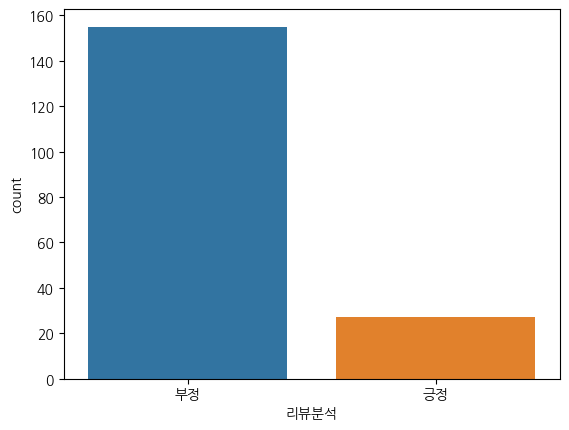

In [58]:
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt
sns.countplot(df, x='리뷰분석')
plt.show()

In [61]:
# 이모티콘 없애는 코드
df[0] = df[0].str.replace('[^\w\s]', '', regex=True)

In [62]:
from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

# 단어 토큰화
# 명사(NN), 동사(VV), 형용사(VA)

total = []
for i in tqdm(df[0]):
    t = okt.normalize(i)
    t = kkma.pos(t)
    box = []
    for j in t:
        if j[1][:2] == 'NN':
            box.append(j[0])
        elif j[1] in ['VV','VA']:
            box.append(j[0]+'다')
    total.append(" ".join(box))

df['토큰화'] = total
df

100%|██████████| 182/182 [00:08<00:00, 22.72it/s]
C:\Users\LG\AppData\Local\Temp\ipykernel_972\1097118245.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['토큰화'] = total


,0,리뷰분석,토큰화
0,저는 원래 악지성피부입니다 근데 스트라이덱스 패드를 너무 과하게 사용해서 피부장벽 ...,부정,원래 악지 피부 스트라 이덱스 패드 과하다 사용하다 피부 장벽 벗겨지다 갈라지다 속...
1,여드름 난 지복합성 피부인 제가 사용하기엔 기름지고 번들거려서 별로였어요 ㅠㅠ,부정,여드름 낳다 지 복합 피부 제가 사용 하기 기름지다 번들거리다 별
2,안타깝게도 저랑은 잘 맞지 않는 지성 피부인데 가벼운 에센스나 수분크림도 맞지가 않...,부정,안타깝다 은 맞다 지성 피부 가벼운 에센스 수분 크림 맞다 가다 유 부족 간가 하다...
3,아니 자극은 없고 순한게 느껴지는데 보습 잘 되는거 느껴지는데 제 피부가 그렇게 민...,부정,알다 자극 없다 순하다 것 느껴지다 보습 되다 거 느껴지다 피부 편 피부 뒤집다 짐...
4,리뷰를 보고 사야했는데 남들 다 쓰길래 좋은줄 알고 샀다가 여드름 폭탄 맞았어요 제...,부정,리뷰 보다 사다 하다 남 쓰다 좋다 줄 알다 사다 여드름 폭탄 맞다 피부 타입 지성...
...,...,...,...
178,건성인 엄마에게 산물무난하게 잘 쓰시는 듯 한데 ㅠ,긍정,건성 엄마 산물 쓰다 듯 한데
179,순하다고 하는데 제 피부가 악건성이라 그런지 자극이 느껴져서 사용을 하지 않고 있어...,부정,순하다 하다 피부 악 건성 그렇다 자극 느껴지다 사용 하다 피부 괜찮다 써보다 교
180,저는 너무 별로더라구요 답답하고 유분기가 너무 많아서 다음날 노란색 뭐가 올라오기도...,부정,별 로더 유 분기 많다 다음날 노란색 올라오다 허다 수분 보충 것 말르다 비틀어지다...
181,제 피부가 여즘 따갑고 예민한데 어릴 때 피부과에서 준게 생각나서 구매했는데 피부과...,부정,피부 여 즘 따갑다 데 어리다 때 피부과 주다 것 생각나다 구매 피부 과용 그렇다 ...


In [63]:
df_negative = df[df['리뷰분석'] == '부정']
df_negative

,0,리뷰분석,토큰화
0,저는 원래 악지성피부입니다 근데 스트라이덱스 패드를 너무 과하게 사용해서 피부장벽 ...,부정,원래 악지 피부 스트라 이덱스 패드 과하다 사용하다 피부 장벽 벗겨지다 갈라지다 속...
1,여드름 난 지복합성 피부인 제가 사용하기엔 기름지고 번들거려서 별로였어요 ㅠㅠ,부정,여드름 낳다 지 복합 피부 제가 사용 하기 기름지다 번들거리다 별
2,안타깝게도 저랑은 잘 맞지 않는 지성 피부인데 가벼운 에센스나 수분크림도 맞지가 않...,부정,안타깝다 은 맞다 지성 피부 가벼운 에센스 수분 크림 맞다 가다 유 부족 간가 하다...
3,아니 자극은 없고 순한게 느껴지는데 보습 잘 되는거 느껴지는데 제 피부가 그렇게 민...,부정,알다 자극 없다 순하다 것 느껴지다 보습 되다 거 느껴지다 피부 편 피부 뒤집다 짐...
4,리뷰를 보고 사야했는데 남들 다 쓰길래 좋은줄 알고 샀다가 여드름 폭탄 맞았어요 제...,부정,리뷰 보다 사다 하다 남 쓰다 좋다 줄 알다 사다 여드름 폭탄 맞다 피부 타입 지성...
...,...,...,...
177,좋다해서 써봤는데 수부지인 저한텐 기름지고 안맞아요,부정,좋다 하다 쓰다 수부 지인 저 터 기름지다 맞다
179,순하다고 하는데 제 피부가 악건성이라 그런지 자극이 느껴져서 사용을 하지 않고 있어...,부정,순하다 하다 피부 악 건성 그렇다 자극 느껴지다 사용 하다 피부 괜찮다 써보다 교
180,저는 너무 별로더라구요 답답하고 유분기가 너무 많아서 다음날 노란색 뭐가 올라오기도...,부정,별 로더 유 분기 많다 다음날 노란색 올라오다 허다 수분 보충 것 말르다 비틀어지다...
181,제 피부가 여즘 따갑고 예민한데 어릴 때 피부과에서 준게 생각나서 구매했는데 피부과...,부정,피부 여 즘 따갑다 데 어리다 때 피부과 주다 것 생각나다 구매 피부 과용 그렇다 ...


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
dtm = cv.fit_transform(df_negative['토큰화'])
dtm_df = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
dtm_df

,가격,가깝다,가다,가라앉다,가라앉히다,가려움,가려움증,가렵다,가벼운,가볍다,...,환절기,효과,효과적,후기,후회,휴가,흉터,흔적,흘르다,흡수
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
a = dtm_df.sum().sort_values(ascending=False)
filtered_a = a[a > 3]
filtered_a

쓰다     94
피부     90
하다     79
좋다     64
맞다     60
       ..
못쓰다     4
기한      4
올리브     4
제형      4
자체      4
Length: 163, dtype: int64

In [65]:
words_to_drop = ['하다', '먹다', '오다', '되다', '같다', '나다', '있다', '알다', '가다', '이렇다', '보내다']

for word in words_to_drop:
    if word in filtered_a.index:
        filtered_a = filtered_a.drop(word)

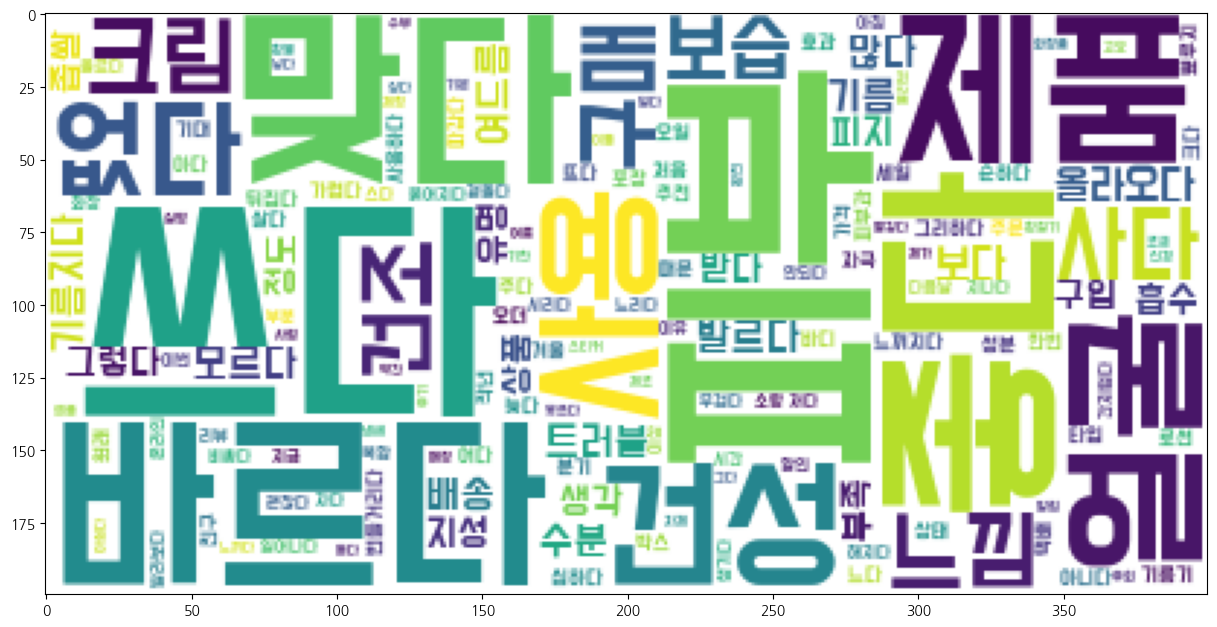

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white', font_path='..\data\BMDOHYEON_ttf.ttf')
cloud = wc.generate_from_frequencies(filtered_a.to_dict())
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.show()

In [133]:
from PIL import Image
import numpy as np  # 컴퓨터에서 이미지는 픽셀값으로 대체 => 넘파이 이용

img = Image.open('./leap.jpg')
img = np.array(img)
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

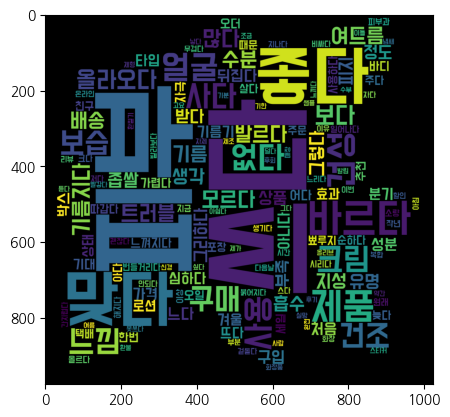

In [136]:
wc = WordCloud(background_color='black', font_path='../data/BMDOHYEON_ttf.ttf', mask=img)
cloud = wc.generate_from_frequencies(filtered_a.to_dict())
plt.imshow(cloud)
plt.show()

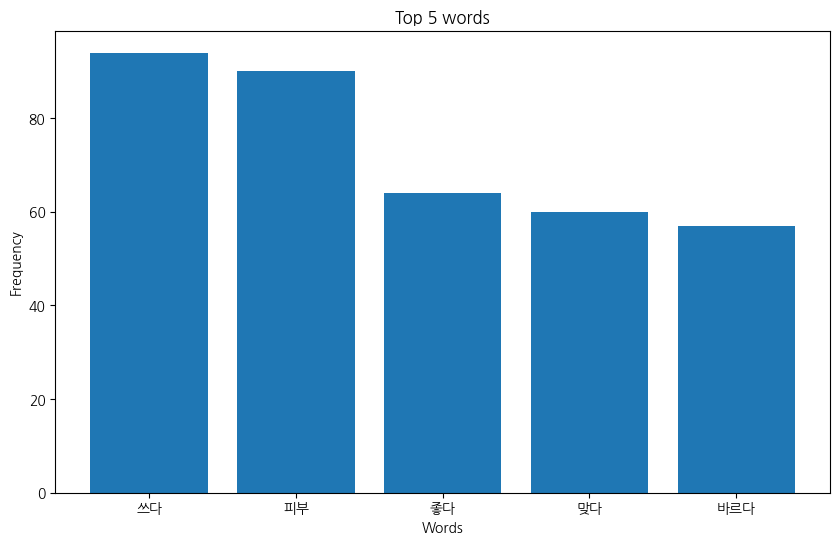

In [67]:
s = filtered_a

# Select top 5 items
top_5 = s.head(5)

# Plot bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_5.index, top_5.values)

plt.title('Top 5 words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [68]:
# 부정리뷰 토큰화 1위
indices = df[df['토큰화'].str.contains(filtered_a.index[0])].index

In [69]:
selected_df = df.loc[indices]
selected_df = selected_df.head()[0]
selected_df

2     안타깝게도 저랑은 잘 맞지 않는 지성 피부인데 가벼운 에센스나 수분크림도 맞지가 않...
3     아니 자극은 없고 순한게 느껴지는데 보습 잘 되는거 느껴지는데 제 피부가 그렇게 민...
4     리뷰를 보고 사야했는데 남들 다 쓰길래 좋은줄 알고 샀다가 여드름 폭탄 맞았어요 제...
9       유명한 제품이라 리뷰도 좋고 사봤는데 따갑고 빠랐을때 너무 아파서 아깝지만 못쓰겠어요
12    엄청 건조한 피부라서 유분이 부족하다고 생각해서 샀는데 쓰고난 다음날 트러블 났어요...
Name: 0, dtype: object

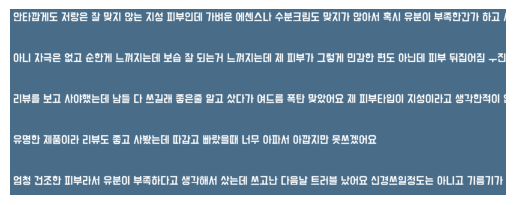

In [70]:
from PIL import Image, ImageDraw, ImageFont

# 텍스트 데이터 합치기
text = '\n\n\n\n'.join(selected_df.values)

# 폰트 설정 (여기서는 기본 폰트 사용)

font_path = "../data/BMDOHYEON_ttf.ttf"
font = ImageFont.truetype(font_path,30)


# 이미지 생성
image = Image.new('RGB', (1600, 600), color=(73, 109, 137))
d = ImageDraw.Draw(image)

# 텍스트 쓰기
d.text((10,10), text, font=font)

# 이미지 저장
# image.save('text_image.png')
plt.imshow(image)
plt.axis('off')
plt.show()